# C6.W2 NYT: Geodata processing

Performed by Alexander Manushin 10.02.2019

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
from matplotlib import cm

import os
os.environ['PROJ_LIB'] = r'C:\Users\aaman\.conda\pkgs\proj4-5.2.0-hc56fc5f_1\Library\share'
from mpl_toolkits.basemap import Basemap

%matplotlib inline

## 1. Read data and sum trips

Загрузите агрегированные данные о поездках в мае 2016. Просуммируйте общее количество поездок такси из каждой географической зоны и посчитайте количество ячеек, из которых в мае не было совершено ни одной поездки.

Load aggregated data of trips for May 2016. Sum total trips' quantity from each geographical zone and count the number of cells of which not a single trip was made in May.

In [2]:
data = pd.read_csv('aggr_data.csv')

In [3]:
data.head()

pickup_region tpep_pickup_datetime  trips
0             15  2016-05-01 00:00:00      0
1             15  2016-05-01 01:00:00      0
2             15  2016-05-01 02:00:00      0
3             15  2016-05-01 03:00:00      0
4             15  2016-05-01 04:00:00      0

In [4]:
data.groupby('pickup_region').sum()

trips
pickup_region       
15                 1
16                 1
25                 1
27                 1
32                19
45                 3
49                 5
61                 1
77                 2
80                 1
83                 4
90                 1
109                1
110                1
111                2
112               14
116                1
125                1
140                2
143                1
144                1
171                1
172                1
181                1
183                1
197                1
198                1
217                1
218                1
223                1
...              ...
2422               1
2423               3
2424               2
2426               3
2427               1
2428               6
2429              12
2430               4
2431               4
2432               3
2433               1
2434               1
2435               1
2466               1
2467               2
2468               1
2470               2
2472               4
2473               8
2474               1
2476               2
2478               4
2479               4
2481               8
2482               5
2483               2
2484               1
2485               2
2486               3
2487               3

[1217 rows x 1 columns]

In [5]:
print 'Zero trips regions: {}'.format(2500 - data.groupby('pickup_region').sum().shape[0])

Zero trips regions: 1283


## 2. Static map with ESB point

Нарисуйте статическую карту Нью-Йорка. Поставьте на карте точку там, где находится Эмпайр-Стейт-Билдинг.

Plot static map of New York City. Point the Empire State Building on map.

In [6]:
west, south, east, north = -74.25559, 40.49612, -73.70001, 40.91553

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=2352050.65614,210279.486088,2498121.86693,371244.25363&bboxSR=2262&imageSR=2262&size=1500,1652&dpi=96&format=png32&f=image


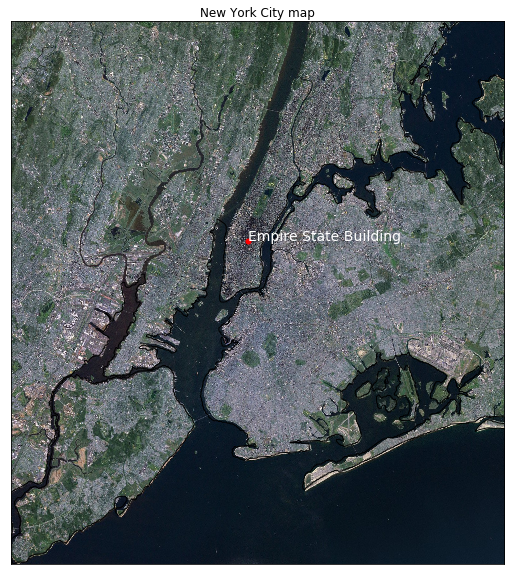

In [7]:
#creating map
m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='f', epsg=2262)

fig = plt.figure(figsize=(10,10))
m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 1500, verbose= True)
m.drawcoastlines()
plt.title('New York City map')

# Map (long, lat) to (x, y) for plotting

x, y = m(-73.985667, 40.748444)
plt.plot(x, y, 'ok', markersize=5, color='red')
plt.text(x, y, 'Empire State Building', fontsize=14, color='white')

## 3. Visualization on a map

Поверх статической карты Нью-Йорка визуализируйте данные о поездках из каждой ячейки так, чтобы цветовая шкала, в которую вы окрашиваете каждую ячейку, показывала суммарное количество поездок такси из неё.

Over the NYC static map visualize data of trips from each cell so that color scale that paints each cell shows the total trips' quantity from the cell.

In [8]:
#preprocessing of data

In [9]:
data['x']=(data.pickup_region.values)/50+1
data['y']=(data.pickup_region.values - 1)%50 + 1

In [10]:
trip_sum = pd.DataFrame(np.zeros([50,50]), index=range(1,51), columns=range(1,51))
pivot_sum = pd.pivot_table(data, values='trips', index=['y'], columns=['x'], aggfunc=np.sum).fillna(0)
trip_sum = trip_sum.add(pivot_sum)
trip_sum.replace(0, np.nan, inplace = True)

In [11]:
#matrix of trip sums
trip_sum

1    2     3    4    5    6     7      8     9     10 ...       41  \
1    NaN  NaN   NaN  NaN  NaN  NaN   NaN    NaN   NaN   NaN ...      NaN   
2    NaN  NaN   NaN  NaN  NaN  NaN   NaN    NaN   NaN   NaN ...      NaN   
3    NaN  NaN   NaN  NaN  NaN  NaN   NaN    NaN   NaN   NaN ...      NaN   
4    NaN  NaN   NaN  NaN  NaN  NaN   NaN    NaN   NaN   NaN ...      NaN   
5    NaN  NaN   NaN  NaN  NaN  NaN   NaN    NaN   NaN   NaN ...      NaN   
6    NaN  NaN   NaN  NaN  NaN  NaN   1.0    NaN   NaN   NaN ...      NaN   
7    NaN  NaN   NaN  NaN  NaN  NaN   1.0    NaN   NaN   1.0 ...      NaN   
8    NaN  NaN   NaN  NaN  NaN  NaN   1.0    NaN   NaN   NaN ...      NaN   
9    NaN  NaN   1.0  NaN  NaN  1.0   NaN    NaN   NaN   NaN ...      NaN   
10   NaN  NaN   1.0  NaN  NaN  NaN   1.0    NaN   NaN   NaN ...      NaN   
11   NaN  1.0   2.0  NaN  NaN  1.0   NaN    NaN   NaN   NaN ...      1.0   
12   NaN  NaN  14.0  NaN  NaN  1.0   NaN    1.0   1.0   NaN ...      2.0   
13   NaN  NaN   NaN  NaN  NaN  NaN   NaN    NaN   NaN   NaN ...      NaN   
14   NaN  NaN   NaN  NaN  NaN  NaN   1.0    NaN   NaN   1.0 ...      NaN   
15   1.0  NaN   NaN  NaN  NaN  NaN   NaN    NaN   NaN   1.0 ...      NaN   
16   1.0  NaN   1.0  NaN  NaN  NaN   1.0    1.0   1.0   NaN ...      NaN   
17   NaN  NaN   NaN  NaN  1.0  NaN   1.0    NaN   1.0   NaN ...      2.0   
18   NaN  NaN   NaN  NaN  1.0  NaN   NaN    NaN   NaN   NaN ...    500.0   
19   NaN  NaN   NaN  NaN  NaN  1.0   NaN    NaN   NaN   NaN ...   1683.0   
20   NaN  NaN   NaN  NaN  NaN  NaN   3.0    3.0   NaN   NaN ...   1087.0   
21   NaN  NaN   NaN  1.0  NaN  NaN   1.0    NaN   NaN   NaN ...   1169.0   
22   NaN  NaN   NaN  1.0  NaN  2.0   NaN    NaN   NaN   NaN ...   1104.0   
23   NaN  NaN   NaN  NaN  1.0  4.0  75.0    NaN   NaN   NaN ...    876.0   
24   NaN  NaN   NaN  NaN  NaN  NaN  74.0  152.0   NaN   NaN ...    474.0   
25   1.0  NaN   1.0  NaN  NaN  NaN  30.0    1.0   NaN   NaN ...    106.0   
26   NaN  NaN   NaN  NaN  NaN  NaN  13.0   20.0  33.0  28.0 ...    142.0   
27   1.0  2.0   NaN  NaN  NaN  1.0   NaN    NaN   NaN   2.0 ...     68.0   
28   NaN  NaN   NaN  NaN  NaN  NaN   1.0    NaN   1.0   NaN ...     20.0   
29   NaN  NaN   NaN  NaN  3.0  NaN   1.0    7.0   8.0   2.0 ...     17.0   
30   NaN  1.0   NaN  NaN  NaN  NaN   NaN    1.0   2.0   NaN ...      3.0   
31   NaN  NaN   NaN  1.0  NaN  1.0   NaN    NaN   NaN   NaN ...      6.0   
32  19.0  NaN   NaN  NaN  NaN  NaN   NaN    NaN   NaN   1.0 ...     24.0   
33   NaN  4.0   NaN  1.0  NaN  NaN   NaN    NaN   NaN   NaN ...      1.0   
34   NaN  NaN   NaN  NaN  NaN  3.0   NaN    NaN   NaN   NaN ...      2.0   
35   NaN  NaN   NaN  NaN  NaN  NaN   NaN    NaN   NaN   NaN ...     12.0   
36   NaN  NaN   NaN  NaN  NaN  NaN   1.0    NaN   NaN   2.0 ...      1.0   
37   NaN  NaN   NaN  NaN  NaN  NaN   NaN    NaN   NaN   1.0 ...      9.0   
38   NaN  NaN   NaN  NaN  NaN  NaN   NaN    NaN   NaN   NaN ...      4.0   
39   NaN  NaN   NaN  NaN  6.0  1.0   NaN    NaN   NaN   NaN ...      5.0   
40   NaN  1.0   2.0  NaN  NaN  NaN   2.0    NaN   NaN   NaN ...      NaN   
41   NaN  NaN   NaN  NaN  3.0  NaN   2.0    2.0   2.0   NaN ...      NaN   
42   NaN  NaN   NaN  NaN  2.0  1.0   NaN    NaN   1.0   NaN ...      NaN   
43   NaN  NaN   1.0  NaN  NaN  NaN   NaN    1.0   NaN   NaN ...      NaN   
44   NaN  NaN   1.0  NaN  NaN  NaN   NaN    NaN   NaN   1.0 ...      1.0   
45   3.0  NaN   NaN  NaN  NaN  NaN   1.0    NaN   NaN   1.0 ...      NaN   
46   NaN  NaN   NaN  NaN  1.0  NaN   NaN    NaN   NaN   NaN ...      NaN   
47   NaN  NaN   NaN  1.0  NaN  NaN   NaN    NaN   NaN   NaN ...      2.0   
48   NaN  NaN   NaN  1.0  NaN  NaN   NaN    NaN   NaN   NaN ...      2.0   
49   5.0  NaN   NaN  NaN  NaN  NaN   NaN    NaN   1.0   NaN ...      2.0   
50   NaN  NaN   NaN  NaN  NaN  NaN   NaN    2.0   NaN   NaN ...      1.0   

         42        43       44    45    46    47    48    49   50  
1       NaN       NaN      NaN   NaN   NaN   NaN   NaN   NaN 

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=2352050.65614,210279.486088,2498121.86693,371244.25363&bboxSR=2262&imageSR=2262&size=1500,1652&dpi=96&format=png32&f=image


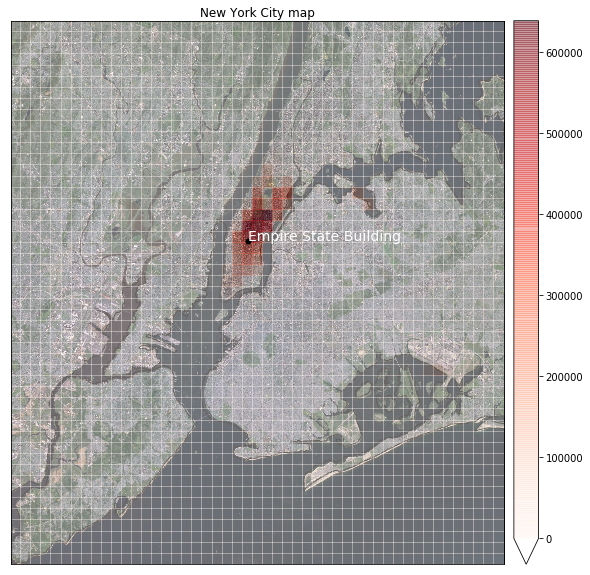

In [12]:
# map
fig = plt.figure(figsize=(10,10))
m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 1500, verbose= True)
m.drawcoastlines()
plt.title('New York City map')

# ESB point
x, y = m(-73.985667, 40.748444)
plt.plot(x, y, 'ok', markersize=5, color='black')
plt.text(x, y, 'Empire State Building', fontsize=14, color='white')

# colorgrid
lons, lats = m.makegrid(50, 50)
x,y = m(lons,lats)
my_cmap = plt.get_cmap('Reds')
my_cmap.set_under('white')
cs = m.pcolormesh(x, y, trip_sum.fillna(0), cmap = my_cmap, alpha=0.4, zorder=2)
m.colorbar(cs, extend = 'min')
plt.show()

## 4. Interactive map with Statue of Liberty point

Вставьте интерактивную карту Нью-Йорка — такую, которую можно прокручивать и увеличивать. Поставьте метку там, где находится статуя свободы.

Add interactive NYC map - one that can be scrolled and zoomed. Point the Statue of Liberty.

In [13]:
# import folium interactive map
import folium

In [14]:
#plot map
m = folium.Map(location=[40.730610, -73.935242], tiles='OpenStreetMap', zoom_start=11)
folium.Marker([40.689247, -74.044502], tooltip='Statue of Liberty').add_to(m)
m

## 5. Interactive map with cells mean month trips

Нарисуйте на интерактивной карте Нью-Йорка ячейки так, чтобы их цвет показывал среднее за месяц количество поездок такси в час из этой зоны.

On the interactive NYC map plot cells so that their color shows average monthly quantity of taxi trips per hour from the zone.

In [15]:
#read regions data
regions = pd.read_csv('regions.csv', ';')
regions.head()

region      west       east      south      north
0       1 -74.25559 -74.244478  40.496120  40.504508
1       2 -74.25559 -74.244478  40.504508  40.512896
2       3 -74.25559 -74.244478  40.512896  40.521285
3       4 -74.25559 -74.244478  40.521285  40.529673
4       5 -74.25559 -74.244478  40.529673  40.538061

In [16]:
#preprocessing of geo data (creating poligons)
from geojson import Polygon, GeometryCollection, Feature, FeatureCollection, dump

def polygons(regions):
    polygons = []
    for i in range(len(regions)):
        r_coord = [(regions.west.values[i],regions.south.values[i]),(regions.east.values[i],regions.south.values[i]),
                  (regions.east.values[i],regions.north.values[i]),(regions.west.values[i],regions.north.values[i]),
                  (regions.west.values[i],regions.south.values[i])]
        f = Feature(geometry = Polygon([r_coord]), properties = {'reg_id':str(regions.region.values[i])})
        polygons.append(f)
    return FeatureCollection(polygons)

geo_data = polygons(regions)

In [17]:
#preprocessing of trips data
trips_mean = data.groupby('pickup_region').mean()
trips_mean.reset_index(inplace=True)
trips_mean.pickup_region = trips_mean.pickup_region.astype(str)

In [18]:
#plot a map
m = folium.Map(location=[40.730610, -73.935242], tiles='OpenStreetMap', zoom_start=11)

#plot SoL point
folium.Marker([40.689247, -74.044502], tooltip='Statue of Liberty').add_to(m)

#plot colorgrid
folium.Choropleth(
    geo_data=geo_data,
    name='choropleth',
    data=trips_mean,
    columns=['pickup_region', 'trips'],
    key_on='feature.properties.reg_id',
    fill_color='Reds',
    nan_fill_color='gray',
    fill_opacity=0.4,
    line_opacity=0.1,
    legend_name='Mean trips (%)'
).add_to(m)

m

## 6. Checking the regions from which the trip is impossible

Чтобы не выбирать из всех 2500 ячеек вручную, отфильтруйте ячейки, из которых в мае совершается в среднем меньше 5 поездок в час. Посчитайте количество оставшихся. Проверьте на карте, что среди этих ячеек нет таких, из которых поездки на самом деле невозможны.

In order not to select manually from all 2500 cells, filter out cells from which on average less than 5 trips per hour are made in May. Count the number remaining. Check on the map that among these cells there are none of which trips are actually impossible.

In [19]:
#data filtration
trips_mean_filtered = trips_mean[trips_mean.trips > 5]
trips_mean_filtered.sort_values('trips').head()

pickup_region     trips     x     y
445          1221  5.043011  25.0  21.0
615          1441  5.081989  29.0  41.0
751          1630  5.159946  33.0  30.0
449          1225  5.364247  25.0  25.0
821          1733  5.420699  35.0  33.0

In [20]:
trips_mean_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 344 to 1084
Data columns (total 4 columns):
pickup_region    102 non-null object
trips            102 non-null float64
x                102 non-null float64
y                102 non-null float64
dtypes: float64(3), object(1)
memory usage: 4.0+ KB


In [21]:
#save trips into csv
trips_mean_filtered.to_csv('trip_mean_filtered.csv', index=False)

In [22]:
print '{} regions has more then 5 trips per hour'.format(len(trips_mean_filtered))

102 regions has more then 5 trips per hour


In [23]:
#plot a map with filtered data
m = folium.Map(location=[40.730610, -73.935242], tiles='OpenStreetMap', zoom_start=11)

#plot SoL poin
folium.Marker([40.689247, -74.044502], tooltip='Statue of Liberty').add_to(m)

#plot grid
folium.Choropleth(
    geo_data=geo_data,
    name='choropleth',
    data=trips_mean_filtered,
    columns=['pickup_region', 'trips'],
    key_on='feature.properties.reg_id',
    fill_color='Reds',
    nan_fill_color='gray',
    fill_opacity=0.4,
    line_opacity=0.1,
    legend_name='Mean trips (%)'
).add_to(m)

m

Checking result: trips are possible from all regions which has more then 5 trips per hour

## 7. Jupyter notebook saving

Сохраните ноутбук в формате html, запакуйте ipynb и html в один архив и загрузите его в форму (html облегчит задачу проверки вашим рецензентам — в ipynb динамические карты часто не сохраняются, а для выполнения кода рецензентам придётся устанавливать все библиотеки).

Save the jupyter notebook in html format, pack ipynb and html into one archive and upload it to the form (html will make it easier for your reviewers to check - dynamic cards are often not saved in ipynb, and reviewers will have to install all libraries to execute the code).